### File to analyze the self created dataset

In [1]:
from src.data.dataloader import VesselCaptureDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Set font and fontsize globally
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 11

In [2]:
data_dir = "data/processed"
dataset = VesselCaptureDataset(data_dir)

In [3]:
print("Number of samples:", len(dataset))

Number of samples: 5451


In [4]:
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

Average vessel volume: 400.22
Average liquid volume: 184.10


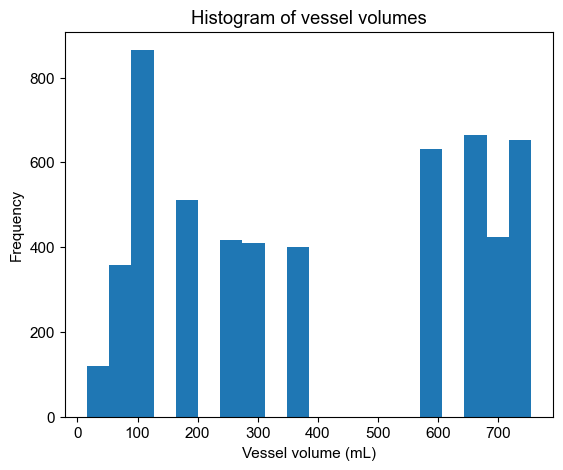

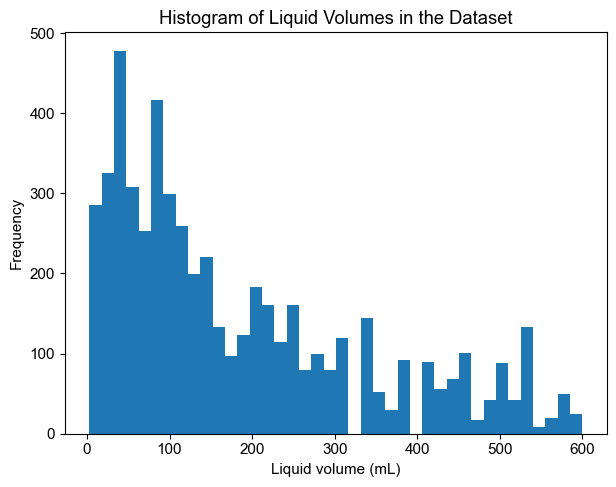

In [5]:
# get average of all vessel volumes
vessel_vol_sum = 0
liquid_vol_sum = 0
vessel_vol_list = []
liquid_vol_list = []

for i, data in enumerate(data_loader):
    vessel_vol = data["vol_vessel"]
    # store value for each sample for histogram
    vessel_vol_list.append(vessel_vol.item())
    vessel_vol_sum += vessel_vol.item()
    liquid_vol = data["vol_liquid"]
    # store value for each sample for histogram
    liquid_vol_list.append(liquid_vol.item())
    liquid_vol_sum += liquid_vol.item()

vessel_vol_avg = vessel_vol_sum/len(dataset)
liquid_vol_avg = liquid_vol_sum/len(dataset)

# print results with 2 decimal places
print("Average vessel volume:", "{:.2f}".format(vessel_vol_avg))
print("Average liquid volume:", "{:.2f}".format(liquid_vol_avg))

# plot histogram of vessel volumes
plt.figure(figsize=(6.3, 5))
plt.hist(vessel_vol_list, bins=20)
plt.title("Histogram of vessel volumes")
plt.xlabel("Vessel volume (mL)")
plt.ylabel("Frequency")
plt.show()

# plot histogram of liquid volumes
plt.figure(figsize=(6.3, 5))
plt.hist(liquid_vol_list, bins=40)
plt.title("Histogram of Liquid Volumes in the Dataset")
plt.xlabel("Liquid volume (mL)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("output/histogram_liquid_volume.png", format="png", dpi=600)
plt.show()

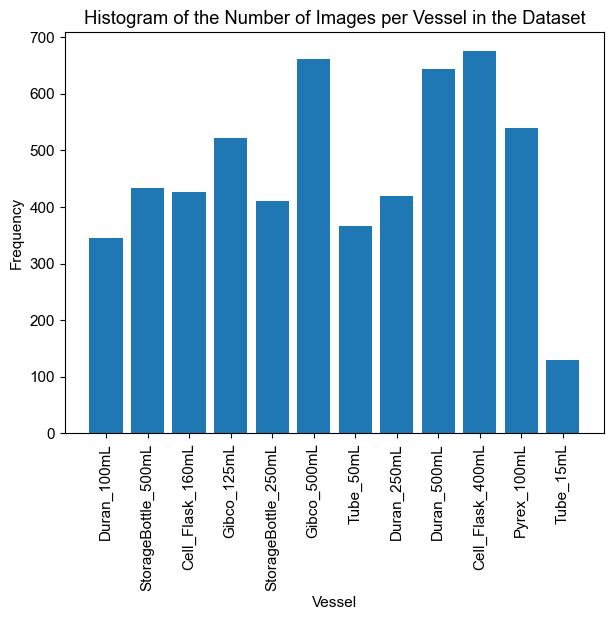

In [92]:
from collections import Counter

vessel_names = []
for i, data in enumerate(data_loader):
    vessel_name = data["vessel_name"]
    vessel_names.append(str(vessel_name))
    #print(vessel_names)

# Count the occurrences of each vessel name
name_counts = Counter(vessel_names)

# Extract unique vessel names and their counts
unique_vessel_names = [name[2:-2] for name in name_counts.keys()]  # Remove brackets and quotes
vessel_name_counts = list(name_counts.values())

# Plot histogram of vessel names
# bar without brackets for names
plt.figure(figsize=(6.3, 5))
plt.bar(unique_vessel_names, vessel_name_counts)
plt.title("Histogram of the Number of Images per Vessel in the Dataset")
plt.xlabel("Vessel")
plt.ylabel("Frequency")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig("output/histogram_vessel_names.png", format="png", dpi=1200)
plt.show()

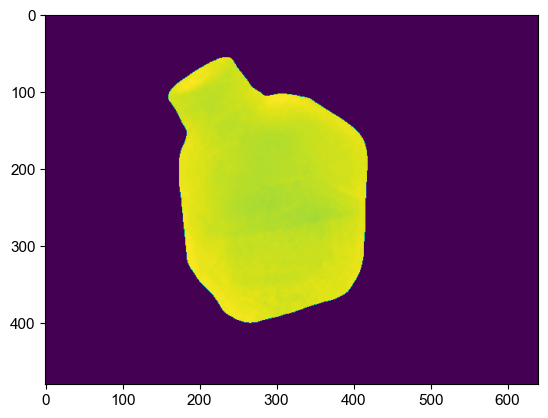

In [6]:
# visualize vessel depth image
plt.imshow(vessel_depth)

In [7]:
# resize vessel depth image
#vessel_depth = vessel_depth[::3, ::3]

# visualize resized vessel depth image
#plt.imshow(vessel_depth)

In [19]:
# find mean of all vessel depth images in the dataset
vessel_depth_sum = 0

for i, data in enumerate(data_loader):
    vessel_depth = data["vessel_depth"]
    vessel_depth_sum += vessel_depth.sum()/vessel_depth.numel()

vessel_depth_avg = vessel_depth_sum/len(dataset)

# calculate std of all vessel depth images in the dataset
vessel_depth_std_sum = 0
for i, data in enumerate(data_loader):
    vessel_depth = data["vessel_depth"]
    vessel_depth_std_sum += (vessel_depth - vessel_depth_avg)**2

vessel_depth_std = (vessel_depth_std_sum/len(dataset))**0.5


# print results with 2 decimal places
print("Average vessel depth:", "{:.2f}".format(vessel_depth_avg))
print("Std of vessel depth:", "{:.2f}".format(vessel_depth_std))

Average vessel depth: 0.12


TypeError: unsupported format string passed to Tensor.__format__

In [17]:
# same for liquid depth
liquid_depth_sum = 0
for i, data in enumerate(data_loader):
    liquid_depth = data["liquid_depth"]
    liquid_depth_sum += liquid_depth.sum()/liquid_depth.numel()

liquid_depth_avg = liquid_depth_sum/len(dataset)

# print results with 2 decimal places
print("Average liquid depth:", "{:.2f}".format(liquid_depth_avg))

Average liquid depth: 0.20


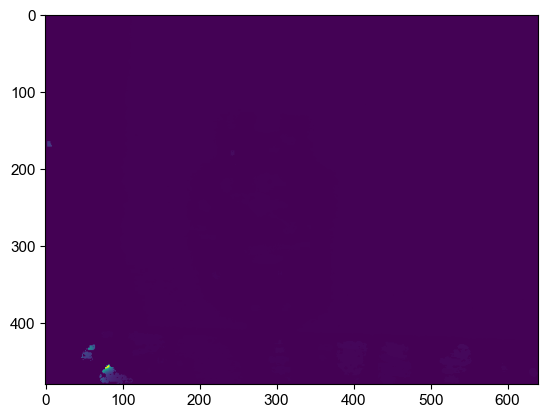

In [13]:
# visualize depth map
plt.imshow(depth_map)

# Load data from processed folder

In [50]:
# load content depth map 
content_depth = np.load("data/processed/Cell_Flask_400mL_570ml_2404_1737/Input_ContentDepth_segmented.npy").astype(np.float32)

# load segmentation mask for content depth map
content_mask = np.load("data/processed/Cell_Flask_400mL_570ml_2404_1737/Input_ContentMaskClean.npy").astype(np.float32)

depth_map = np.load("data/processed/Cell_Flask_400mL_570ml_2404_1737/Input_DepthMap.npy").astype(np.float32)

vessel_depth_path = "data/processed/Cell_Flask_400mL_570ml_2404_1737/Input_EmptyVessel_Depth_segmented.npy"
vessel_depth = np.load(vessel_depth_path).astype(np.float32)

vessel_mask = np.load("data/processed/Cell_Flask_400mL_570ml_2404_1737/Input_VesselMask.npy").astype(np.float32)



In [51]:
# multiply depth map with content mask
content_depth_masked = depth_map * content_mask

# multiply depth map with vessel mask
vessel_depth_masked = depth_map * vessel_mask

Min: 294.0
Max: 1947.0


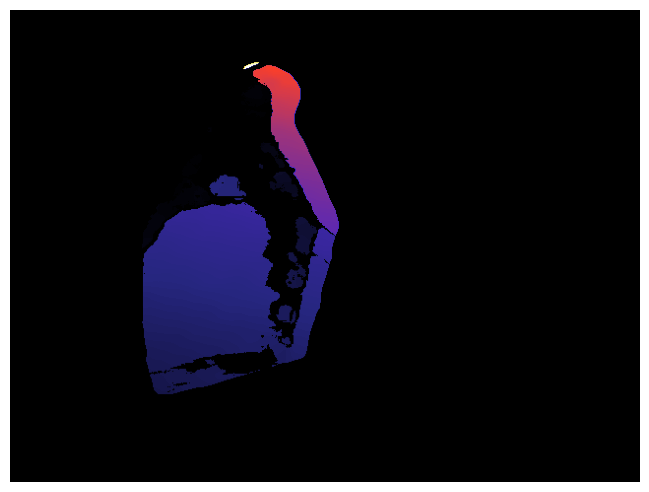

In [53]:
# copy depth map for visualization
tmIm = vessel_depth_masked.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# if value is above 500, set to 500
#tmIm[tmIm > 400] = 400
# 
# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

print("Min:", min)
print("Max:", max)

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.figure(figsize=(6.3, 5))
plt.tight_layout()
plt.imshow(tmIm, cmap="CMRmap")
# turn off axis
plt.axis("off")
# no whitespace around image
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("../segmentation_and_depth/output/411D/depth_map_vessel2.png", format="png", dpi=600)


Min: 311.0
Max: 865.0


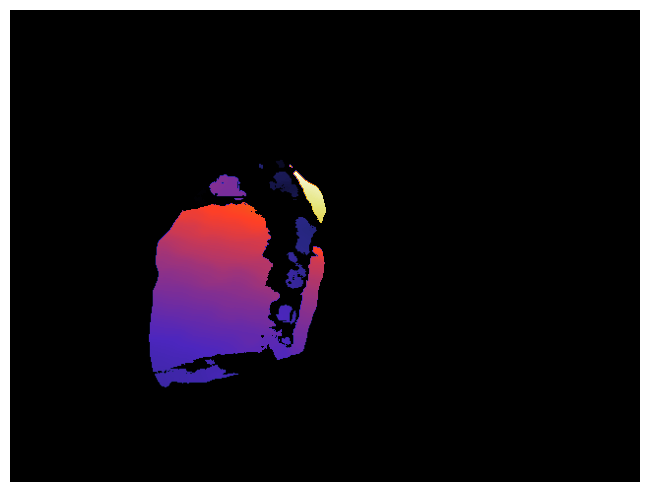

In [54]:
# copy depth map for visualization
tmIm = content_depth_masked.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# if value is above 500, set to 500
#tmIm[tmIm > 400] = 400
# 
# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

print("Min:", min)
print("Max:", max)

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.figure(figsize=(6.3, 5))
plt.tight_layout()
plt.imshow(tmIm, cmap="CMRmap")
# turn off axis
plt.axis("off")
# no whitespace around image
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("../segmentation_and_depth/output/411D/depth_map_liquid2.png", format="png", dpi=600)

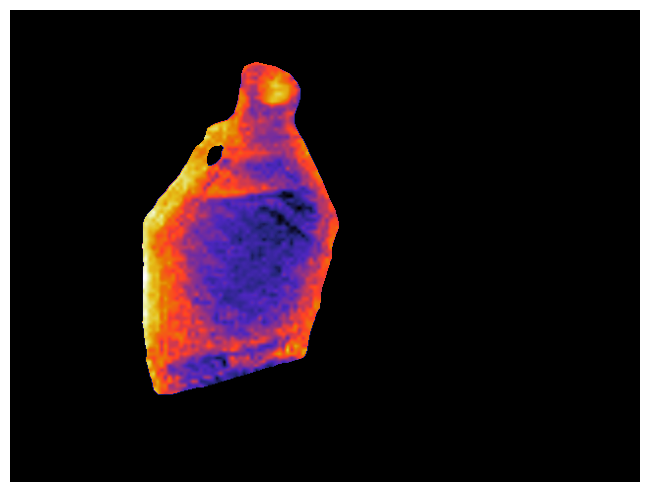

In [55]:
# copy depth map for visualization
tmIm = vessel_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.figure(figsize=(6.3, 5))
plt.tight_layout()
plt.imshow(tmIm, cmap="CMRmap")

# turn off axis
plt.axis("off")
# no whitespace around image
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("../segmentation_and_depth/output/411D/predicted_depth_map_vessel2.png", format="png", dpi=600)

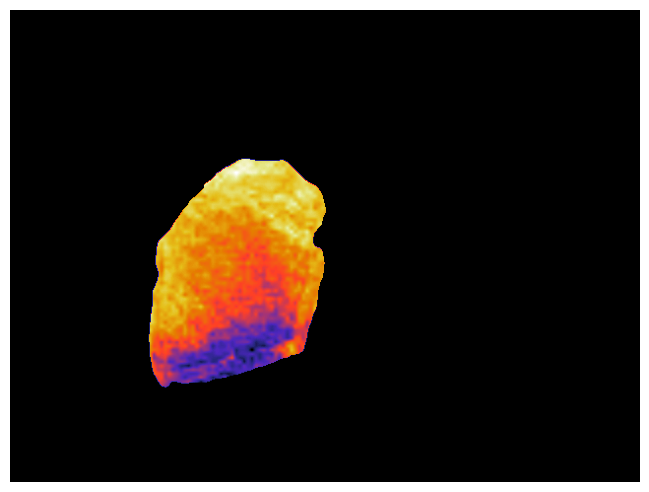

In [56]:
# copy depth map for visualization
tmIm = content_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.figure(figsize=(6.3, 5))
plt.tight_layout()
plt.imshow(tmIm, cmap="CMRmap")

# turn off axis
plt.axis("off")
# no whitespace around image
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("../segmentation_and_depth/output/411D/predicted_depth_map_liquid2.png", format="png", dpi=600)

(-0.5, 639.5, 479.5, -0.5)

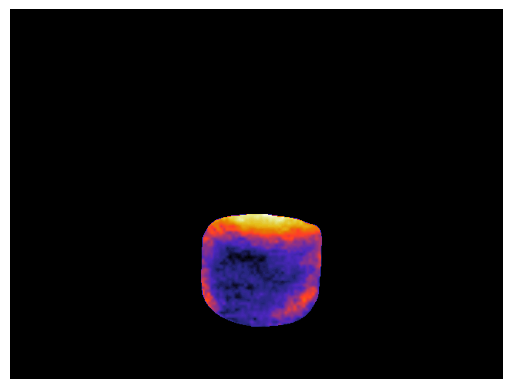

In [77]:
# copy depth map for visualization
tmIm = content_depth.copy()
# squeeze depth map
tmIm = tmIm.squeeze()

# normalize tmIm to values between 0-255

# find min and max values for non zero values   
min = tmIm[tmIm != 0].min()
max = tmIm[tmIm != 0].max()

# normalize non zero values to 0-255
tmIm[tmIm != 0] = (tmIm[tmIm != 0] - min) / (max - min) * 255

# visualize depth map
plt.imshow(tmIm, cmap="CMRmap")
# turn off axis
plt.axis("off")

In [58]:
depth_map.mean()

236.9585

In [59]:
# multiply content depth map with depth map
content_depth = content_depth * depth_map

In [60]:
content_depth.shape

(480, 640)

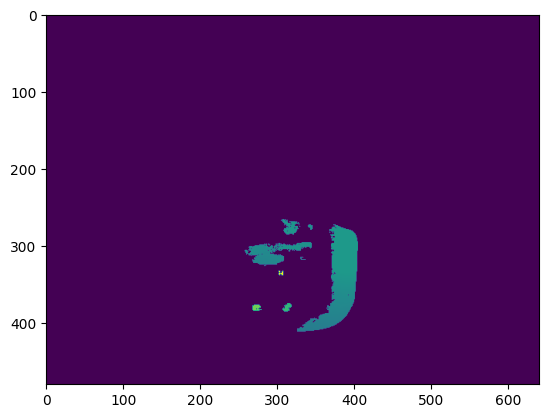

In [61]:
# visualize content depth map
plt.imshow(content_depth)

Text(0.5, 1.0, 'Histogram of content depth values')

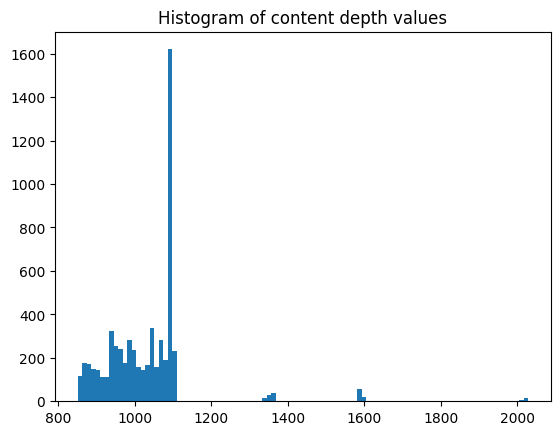

In [62]:
# show histogram of values in depth map ignoring 0 values
plt.hist(content_depth[content_depth != 0].flatten(), bins=100)
plt.title("Histogram of content depth values")

In [65]:
from collections import Counter
import os

folder_path = "data/processed"

percentage_depth_mask_liquid_list = []
percentage_depth_mask_vessel_list = []

# iterate through all folders
for folder in os.listdir(folder_path):

        # if mask does not exist, skip folder
    if not os.path.exists(os.path.join(folder_path, folder, "Input_ContentMaskClean.npy")):
        continue
    if not os.path.exists(os.path.join(folder_path, folder, "Input_VesselMask.npy")):
        continue
    # load depth map
    depth_map = np.load(os.path.join(folder_path, folder, "Input_DepthMap.npy")).astype(np.float32)

    # load segmentation mask for content depth map
    content_mask = np.load(os.path.join(folder_path, folder, "Input_ContentMaskClean.npy")).astype(np.float32)

    # load segmentation mask for vessel depth map
    vessel_mask = np.load(os.path.join(folder_path, folder, "Input_VesselMask.npy")).astype(np.float32)



    # multiply depth map with content mask
    content_depth_masked = depth_map * content_mask

    # multiply depth map with vessel mask
    vessel_depth_masked = depth_map * vessel_mask

    # calculate percentage of pixels that are 0
    content_depth_masked_zero = content_depth_masked[content_depth_masked == 0].size
    content_depth_masked_non_zero = content_depth_masked[content_depth_masked != 0].size
    vessel_depth_masked_zero = vessel_depth_masked[vessel_depth_masked == 0].size
    vessel_depth_masked_non_zero = vessel_depth_masked[vessel_depth_masked != 0].size
    vessel_mask_zero = vessel_mask[vessel_mask == 0].size
    vessel_mask_non_zero = vessel_mask[vessel_mask != 0].size
    content_mask_zero = content_mask[content_mask == 0].size
    content_mask_non_zero = content_mask[content_mask != 0].size

    if content_mask_non_zero == 0:
        continue
    if vessel_mask_non_zero == 0:
        continue

    # calculate percentage of pixels that are 0
    percentage_depth_mask_liquid = (content_depth_masked_zero-content_mask_zero) / content_mask_non_zero * 100
    percentage_depth_mask_vessel = (vessel_depth_masked_zero-vessel_mask_zero) / vessel_mask_non_zero * 100

    # append percentage to list
    percentage_depth_mask_liquid_list.append(percentage_depth_mask_liquid)
    percentage_depth_mask_vessel_list.append(percentage_depth_mask_vessel)


In [66]:
# get average of percentages 

percentage_depth_mask_liquid_list = np.array(percentage_depth_mask_liquid_list)
percentage_depth_mask_vessel_list = np.array(percentage_depth_mask_vessel_list)

percentage_depth_mask_liquid_avg = percentage_depth_mask_liquid_list.mean()
percentage_depth_mask_vessel_avg = percentage_depth_mask_vessel_list.mean()

# print results with 2 decimal places
print("Average percentage of pixels that are 0 in content depth map:", "{:.2f}".format(percentage_depth_mask_liquid_avg))
print("Average percentage of pixels that are 0 in vessel depth map:", "{:.2f}".format(percentage_depth_mask_vessel_avg))


Average percentage of pixels that are 0 in content depth map: 52.05
Average percentage of pixels that are 0 in vessel depth map: 49.76
